### Prepare rules for the all the data sets 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3. Visualize the obtained rules using different plots 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [8]:
df.shape

(2000, 11)

In [9]:
# creating total of each item bought
Total_Item=df.sum()
Total_Item

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

<AxesSubplot:>

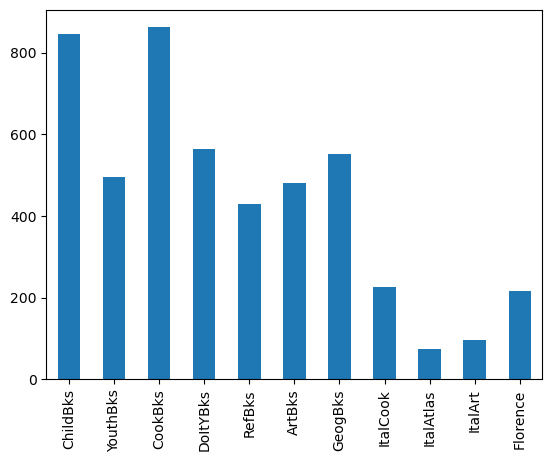

In [10]:
Total_Item.plot.bar()

The top three books bought by customers according to transaction record are: ChildBks, CookBks,GeogBks

### 1. Apriori algorithm with iterating support values and keeping min confidence=0.5

In [13]:
min_support=[]
len_rules=[]
itemset=[]
i=0

for s in np.arange(0.01,0.420,0.010):
    frequent_item = apriori(df, min_support=s, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_support.append(s)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 41


In [14]:
d={'Minimum support':min_support,'Frequent itemsets':itemset,'Association rules number':len_rules}
sup_rules=pd.DataFrame(d)
sup_rules.head()

,Minimum support,Frequent itemsets,Association rules number
0,0.01,594,3272
1,0.02,276,1004
2,0.03,181,558
3,0.04,133,372
4,0.05,100,260


<AxesSubplot:xlabel='Minimum support', ylabel='Association rules number'>

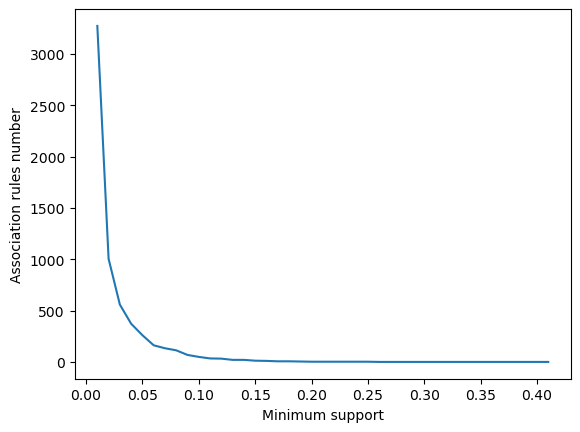

In [15]:
import seaborn as sns
sns.lineplot(data=sup_rules, x="Minimum support", y="Association rules number")

The above plot shows that as minimum support value increases the number of association rules formed decreases.This is because with increase in support value,the number of frequent item sets generated decreases.Less number of frequent sets means less number of rules formed.

### 2. Apriori algorithm with iterating confidence values and min support =0.01

In [16]:
min_conf=[]
len_rules=[]
itemset=[]
i=0

for t in np.arange(0.1,1.025,0.025):
    frequent_item = apriori(df, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=t)
    item_length=len(frequent_item)
    rule_length=len(rules)
    min_conf.append(t)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 37


In [17]:
c={'Minimum confidence':min_conf,'Frequent itemsets':itemset,'Association rules number':len_rules}
conf_rules=pd.DataFrame(c)
conf_rules.head()

,Minimum confidence,Frequent itemsets,Association rules number
0,0.100,594,9079
1,0.125,594,8420
2,0.150,594,7926
3,0.175,594,7528
4,0.200,594,7163


<AxesSubplot:xlabel='Minimum confidence', ylabel='Association rules number'>

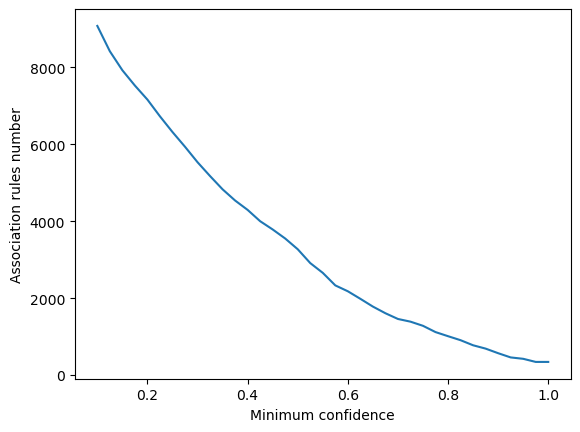

In [19]:
import seaborn as sns
sns.lineplot(data=conf_rules, x="Minimum confidence", y="Association rules number")

The graph shows that as threshold of confidence is increased,the number of association rules get decreased.This is because with higher thresholds, fewer frequent itemsets are generated as few qualify for increased threshold values.

## Changing min length in apriori algorithm and observing the changes in association rules.
Here min support is considered as 0.01 and min confidence as 0.5

In [20]:
k_itemset=[]
len_rules=[]
itemset=[]
i=0

for l in range(1,100):
    frequent_item = apriori(df, max_len=l,min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_item, metric="confidence", min_threshold=0.5)
    item_length=len(frequent_item)
    rule_length=len(rules)
    k_itemset.append(l)
    len_rules.append(rule_length)
    itemset.append(item_length)
    i=i+1
    
print("Number of iterations:",i)

Number of iterations: 99


In [21]:
a={'Length_itemset':k_itemset,'Frequent itemsets':itemset,'Association rules number':len_rules}
itemset_rules=pd.DataFrame(a)
itemset_rules.head()

,Length_itemset,Frequent itemsets,Association rules number
0,1,11,0
1,2,65,32
2,3,208,317
3,4,408,1167
4,5,547,2366


(0.0, 3435.6)

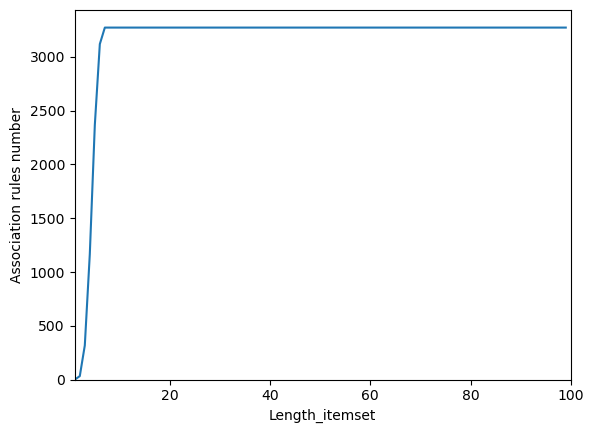

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=itemset_rules, x="Length_itemset", y="Association rules number")
plt.xlim(1,100)
plt.ylim(0,)

The graph shows that with increase in length of itemsets till 10, the number of association rules keep on increasing. Beyond length 10,the number of rules become constant. 

### Association Rules generation by running Apriori with min support=0.01 and min confidence=0.5

In [23]:
# generating frequent itemset
frequent_itemsets= apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [24]:
print("Number of frequent itemsets generated with min support 0.01 is:",(frequent_itemsets.shape[0]))

Number of frequent itemsets generated with min support 0.01 is: 594


In [25]:
# adding a length column which stores the length of item sets generated
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [26]:
frequent_itemsets.head()

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1


In [27]:
# checking the number of frequent itemsets generated for each length
frequent_itemsets['length'].value_counts()

4    200
3    143
5    139
2     54
6     43
1     11
7      4
Name: length, dtype: int64

The maximum number of frequent itemsets generated are of length 4.

In [28]:
rules = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
2174,"(ItalArt, CookBks, RefBks)","(ItalCook, ArtBks, ChildBks, ItalAtlas)",0.0165,0.0115,0.0110,0.666667,57.971014,0.010810,2.965500
2175,"(ItalCook, ItalAtlas, ItalArt)","(CookBks, ArtBks, ChildBks, RefBks)",0.0125,0.0610,0.0110,0.880000,14.426230,0.010238,7.825000
2176,"(CookBks, ItalAtlas, ItalArt)","(ItalCook, ArtBks, ChildBks, RefBks)",0.0130,0.0220,0.0110,0.846154,38.461538,0.010714,6.357000
2177,"(ArtBks, ItalAtlas)","(ChildBks, ItalArt, RefBks, ItalCook, CookBks)",0.0180,0.0145,0.0110,0.611111,42.145594,0.010739,2.534143


In [29]:
# Checking statistical summary of rules generated
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000
mean,0.027498,0.223341,0.021013,0.794653,7.432924,0.013714,inf
std,0.028906,0.142198,0.020536,0.131975,9.120928,0.009386,NaN
min,0.010000,0.011500,0.010000,0.600000,1.404179,0.004155,1.441240
25%,0.014500,0.113500,0.011500,0.666667,2.314815,0.008640,2.489375
50%,0.018000,0.214500,0.014500,0.781250,4.149378,0.010752,3.519700
75%,0.028500,0.423000,0.021000,0.904879,7.672540,0.014866,7.440000
max,0.423000,0.431000,0.256000,1.000000,58.275058,0.078252,inf


In [30]:
print("Total number of association rules generated:",(rules.shape[0]))

Total number of association rules generated: 2179


## Visualization of Association Rules 

## 1. Using Scatter Plot

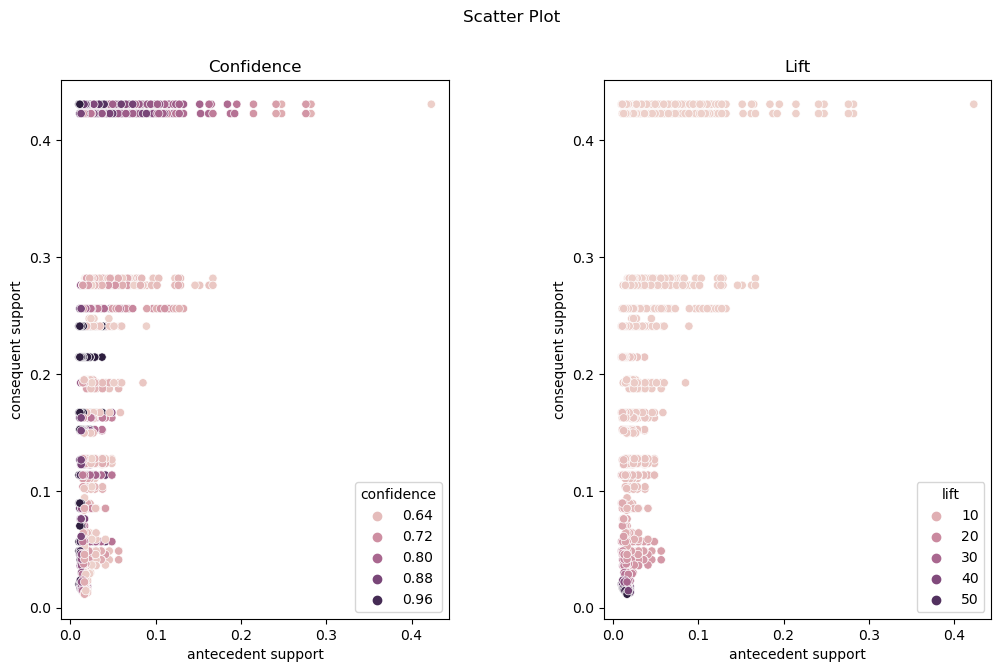

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=axes[0],x='antecedent support',y='consequent support',hue='confidence',data=rules)
axes[0].set_title('Confidence')

sns.scatterplot(ax=axes[1],x='antecedent support',y='consequent support',hue='lift',data=rules)
axes[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

+ The first subplot shows relationship of antecedent and consequent support with confidence which is shown in color gradient.Deep colors indicate high confidence and light colors indicate low confidence.We can see that dark points are concentrated near lower values of x axis.This means high confidence is observed for lower antecedent support values.


+ The second subplot shows  relationship of lift with antecedent and consequent support.Dark color indicates highest lift values.The plot shows taht maximum rules have lift values in range 10-30. Higher values around 40-50 is almost minimal and that too found for very low antecedent and consequent support.

## 2. Heatmap

To generate heatmap,a subset of first ten rules will be considered to avoid overcrowding of map and enhance clarity of map.

In [32]:
rules_map=rules.copy()

In [33]:
# selecting rules with high confidence,lift and support
rules_map=rules_map.loc[(rules_map['lift']>10)& (rules_map['confidence']>0.70)& (rules_map['support']>0.02)]

In [34]:
rules_map.reset_index(drop=True,inplace=True)

In [35]:
# creating a subset of first 10 rules which will be plotted with heatmap
rules_10=rules_map.iloc[0:10,:]
rules_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
1,"(ChildBks, ItalArt)","(ItalCook, ArtBks)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800
2,"(CookBks, ItalAtlas)","(ItalCook, RefBks)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864
3,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
4,(ItalArt),"(CookBks, ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
5,"(ItalArt, DoItYBks)","(ItalCook, ArtBks)",0.0300,0.0565,0.0250,0.833333,14.749263,0.023305,5.661000
6,"(GeogBks, ItalArt)","(ItalCook, ArtBks)",0.0295,0.0565,0.0240,0.813559,14.399280,0.022333,5.060591
7,"(CookBks, ChildBks, ItalArt)","(ItalCook, ArtBks)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000
8,"(ChildBks, ItalArt)","(CookBks, ItalCook, ArtBks)",0.0360,0.0565,0.0285,0.791667,14.011799,0.026466,4.528800
9,"(CookBks, DoItYBks, ItalArt)","(ItalCook, ArtBks)",0.0270,0.0565,0.0250,0.925926,16.388069,0.023475,12.737250


In [36]:
# converting antecedents and consequents to strings
rules_10['antecedents']=rules_10['antecedents'].apply(lambda a: ','.join(list(a)))
rules_10['consequents']=rules_10['consequents'].apply(lambda a: ','.join(list(a)))

In [37]:
print(rules_10[['antecedents','consequents']])

                antecedents              consequents
0                   ItalArt          ItalCook,ArtBks
1          ChildBks,ItalArt          ItalCook,ArtBks
2         CookBks,ItalAtlas          ItalCook,RefBks
3           CookBks,ItalArt          ItalCook,ArtBks
4                   ItalArt  CookBks,ItalCook,ArtBks
5          ItalArt,DoItYBks          ItalCook,ArtBks
6           GeogBks,ItalArt          ItalCook,ArtBks
7  CookBks,ChildBks,ItalArt          ItalCook,ArtBks
8          ChildBks,ItalArt  CookBks,ItalCook,ArtBks
9  CookBks,DoItYBks,ItalArt          ItalCook,ArtBks


In [38]:
# Constructing  pivot table
pvt_table1=rules_10.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_10.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_10.pivot(index='antecedents',columns='consequents',values='lift')

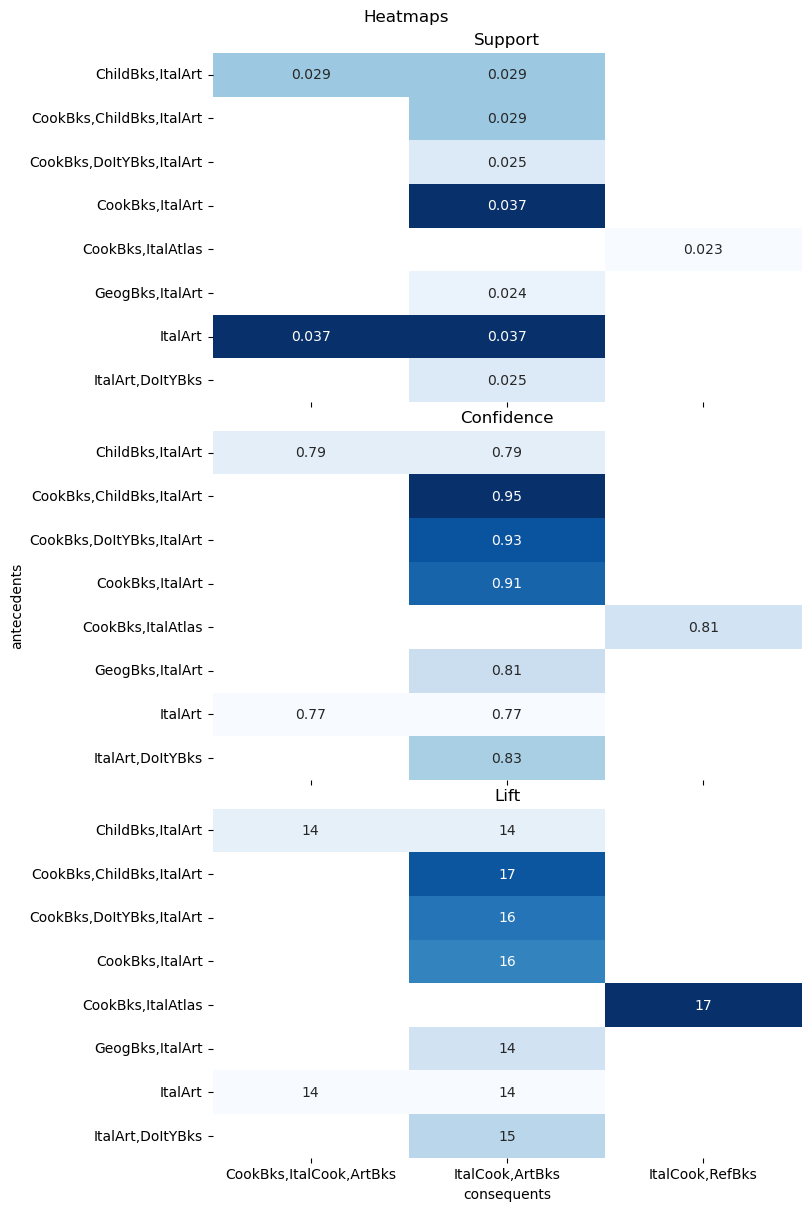

In [39]:
fig, axes = plt.subplots(3,1,sharex=True,constrained_layout = True,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=axes[0],data=pvt_table1,annot=True,cbar=False,cmap='Blues')
axes[0].set_title('Support')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)

sns.heatmap(ax=axes[1],data=pvt_table2,annot=True,cbar=False,cmap='Blues')
axes[1].set_title('Confidence')
axes[1].set(xlabel=None)

sns.heatmap(ax=axes[2],data=pvt_table3,annot=True,cbar=False,cmap='Blues')
axes[2].set_title('Lift')
axes[2].set(ylabel=None)


plt.show()

+ Darker cells imply higher support/confidence/lift values. The blank/white cells imply that no association rule was formed for those antecedent-->sconsequent pairs.
+ The first subplot shows correlation with support values. The highest support is 0.037 for (ItalArt,CookBks)-->(ItalCook,ArtBks).
+ The second subplot shows that consequent(ItalCook,ArtBks) have high confidence for all its antecedents except (CookBks,ItalAtlas) for which no rule was formed.
+ In third subplot, it can be seen (ItalCook,ArtBks) have high lift values for all its antecedents except one.
+ It can be said that (ItalCook,ArtBks) is a very significant consequent i.e these two items have a high change of getting purchased by customers if their antecedents are purchased.